<a href="https://colab.research.google.com/github/muratcanaydogdu21/Insurance/blob/main/transfer_learning_project_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import pickle

import numpy as np
import cv2 as cv

import tensorflow as tf

from google.colab.patches import cv2_imshow

In [3]:
path_to_image = "/content/drive/MyDrive/Kaggle/cats_and_dogs/Pet_images/Cat/10.jpg"

In [4]:
image = cv.imread(path_to_image, cv.IMREAD_COLOR)

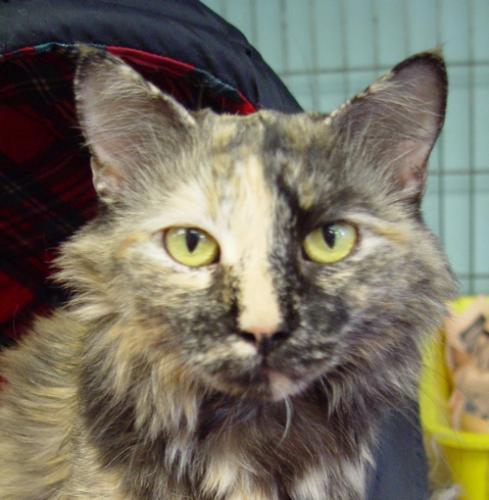

In [5]:
cv2_imshow(image)

In [6]:
image

array([[[ 38,  29,  25],
        [ 36,  27,  23],
        [ 32,  23,  19],
        ...,
        [158, 159, 127],
        [157, 158, 126],
        [156, 157, 125]],

       [[ 42,  33,  29],
        [ 41,  32,  28],
        [ 38,  29,  25],
        ...,
        [158, 159, 127],
        [157, 158, 126],
        [156, 157, 125]],

       [[ 42,  36,  31],
        [ 45,  39,  34],
        [ 46,  40,  35],
        ...,
        [156, 159, 127],
        [156, 159, 127],
        [155, 156, 124]],

       ...,

       [[106, 143, 157],
        [105, 142, 156],
        [ 97, 136, 150],
        ...,
        [  5, 169, 174],
        [  5, 165, 171],
        [  2, 160, 166]],

       [[104, 141, 155],
        [104, 141, 155],
        [ 99, 138, 152],
        ...,
        [  6, 170, 175],
        [  6, 166, 172],
        [  1, 159, 165]],

       [[107, 144, 158],
        [106, 143, 157],
        [103, 142, 156],
        ...,
        [  6, 170, 175],
        [  7, 167, 173],
        [  2, 160, 166]]

In [7]:
resized = cv.resize(image, (128,128))

In [8]:
resized

array([[[ 42,  35,  30],
        [ 27,  18,  13],
        [ 43,  32,  28],
        ...,
        [161, 165, 130],
        [159, 162, 130],
        [157, 159, 127]],

       [[ 51,  46,  38],
        [ 54,  47,  40],
        [ 57,  48,  41],
        ...,
        [161, 165, 130],
        [159, 164, 132],
        [156, 160, 128]],

       [[ 57,  55,  45],
        [ 61,  59,  49],
        [ 63,  58,  49],
        ...,
        [160, 166, 131],
        [159, 166, 133],
        [156, 162, 130]],

       ...,

       [[128, 171, 184],
        [119, 160, 174],
        [116, 154, 168],
        ...,
        [  0, 193, 193],
        [  8, 191, 192],
        [ 16, 169, 175]],

       [[118, 162, 175],
        [109, 152, 165],
        [ 98, 139, 153],
        ...,
        [  2, 194, 194],
        [  7, 188, 190],
        [ 13, 163, 171]],

       [[102, 139, 154],
        [ 96, 139, 152],
        [101, 145, 157],
        ...,
        [  3, 193, 192],
        [  4, 188, 189],
        [  6, 167, 173]]

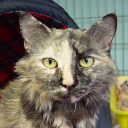

In [9]:
cv2_imshow(resized)

In [10]:
path_to_dataset = "/content/drive/MyDrive/Kaggle/cats_and_dogs/Pet_images"

In [11]:
categories = ["Cat", "Dog"]

In [12]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [13]:
images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

for category in categories:
  img_per_category = 0
  idx = categories.index(category)
  for image in os.listdir(f"{path_to_dataset}/{category}"):
    if img_per_category == 1000:
      break
    path_to_image = f"{path_to_dataset}/{category}/{image}"
    try:
      img = cv.imread(path_to_image, cv.IMREAD_COLOR)
      img = cv.resize(img, (128,128))
      img = normalize(img)
      images.append([img, idx])
      img_per_category += 1

    except Exception as e:
      error += 1
      errors_file.write(f"{error}) {e}\n")
    finally:
      number += 1
    print(f"\rProcessed: {number} | Errors: {error}", end="")

errors_file.close()

Processed: 472 | Errors: 4

In [14]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)

In [15]:
images[0][0].shape

(128, 128, 3)

In [16]:
print(np.array(images)[:,1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [17]:
for _ in range(10):
  random.shuffle(images)

In [18]:
np.array(images)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

In [20]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [21]:
X_train = X[:1600]
y_train = y[:1600]

X_val = X[1600:1800]
y_val = y[1600:1800]

X_test = X[1800:]
y_test = y[1800:]

In [22]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [23]:
print(len(X_train))
print(len(y_train))

print(len(X_val))
print(len(y_val))

print(len(X_test))
print(len(y_test))

468
468
0
0
0
0


In [26]:
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)